In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split




<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

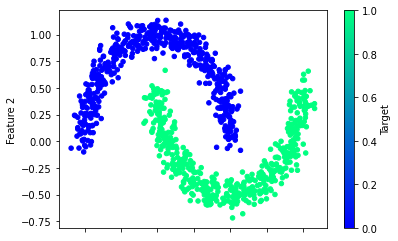

In [2]:


from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [3]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [7]:
# Create the Keras Sequential model
new_model = tf.keras.models.Sequential()

# Add the input and hidden layer
number_hidden_nodes = 6
number_inputs = 2

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the Sequential model
new_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 823us/step - loss: 0.7429 - accuracy: 0.2493
Epoch 2/100
24/24 [==============================] - 0s 867us/step - loss: 0.7069 - accuracy: 0.3827
Epoch 3/100
24/24 [==============================] - 0s 861us/step - loss: 0.6761 - accuracy: 0.5360
Epoch 4/100
24/24 [==============================] - 0s 810us/step - loss: 0.6495 - accuracy: 0.6347
Epoch 5/100
24/24 [==============================] - 0s 824us/step - loss: 0.6256 - accuracy: 0.7147
Epoch 6/100
24/24 [==============================] - 0s 912us/step - loss: 0.6038 - accuracy: 0.7680
Epoch 7/100
24/24 [==============================] - 0s 867us/step - loss: 0.5832 - accuracy: 0.8093
Epoch 8/100
24/24 [==============================] - 0s 825us/step - loss: 0.5634 - accuracy: 0.8347
Epoch 9/100
24/24 [==============================] - 0s 910us/step - loss: 0.5440 - accuracy: 0.8400
Epoch 10/100
24/24 [==============================] - 0s 824us/step - loss: 0.5249 - accura

24/24 [==============================] - 0s 722us/step - loss: 0.2201 - accuracy: 0.9013
Epoch 82/100
24/24 [==============================] - 0s 779us/step - loss: 0.2196 - accuracy: 0.9013
Epoch 83/100
24/24 [==============================] - 0s 765us/step - loss: 0.2191 - accuracy: 0.9013
Epoch 84/100
24/24 [==============================] - 0s 712us/step - loss: 0.2186 - accuracy: 0.9013
Epoch 85/100
24/24 [==============================] - 0s 779us/step - loss: 0.2182 - accuracy: 0.9000
Epoch 86/100
24/24 [==============================] - 0s 824us/step - loss: 0.2177 - accuracy: 0.9000
Epoch 87/100
24/24 [==============================] - 0s 737us/step - loss: 0.2172 - accuracy: 0.9000
Epoch 88/100
24/24 [==============================] - 0s 714us/step - loss: 0.2168 - accuracy: 0.9013
Epoch 89/100
24/24 [==============================] - 0s 694us/step - loss: 0.2165 - accuracy: 0.9013
Epoch 90/100
24/24 [==============================] - 0s 779us/step - loss: 0.2159 - accuracy: 

<AxesSubplot:>

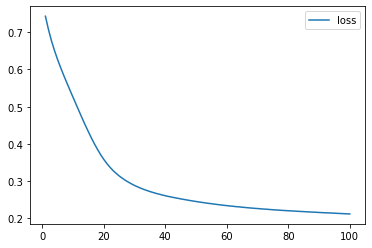

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

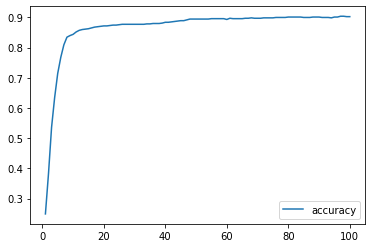

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")